In [ ]:
import pandas as pd
import numpy as np



In [ ]:
import io


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI/Assignments/CarPrice_Assignment.csv')

In [ ]:
dataset.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [ ]:
dataset.shape

(205, 26)

In [ ]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
dataset.drop(columns='car_ID', inplace=True)
dataset.drop(columns='CarName', inplace=True)
dataset.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


ONE HOT CODING USING PD DUMMIES

In [ ]:
dataset = pd.get_dummies(dataset, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem'])

In [ ]:
dataset.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = dataset['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
dataset.drop(columns = 'price',inplace=True)

In [ ]:
dataset.shape

(205, 52)

In [ ]:
x_train = dataset[:102]
y_train = y[:102]
x_test = dataset[102:164]
y_test = y[102:164]
x_val = dataset[164:205]
y_val = y[164:205]

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((102, 52), (41, 52), (62, 52))

DATA NORMALIZATION. Hint: 14 columns have numerical data which need to Normalize, using Statistics method for normalization it converts values from -1 to 1

TRAINING DATA NORMALIZATION:

In [ ]:
mean = x_train.iloc[:,0:14].mean(axis=0)
x_train.iloc[:, 0:14] -= mean
std = x_train.iloc[:,0:14].std(axis=0)
x_train.iloc[:,0:14] /=std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
mean = y_train.iloc[:].mean(axis=0)
y_train.iloc[:] -= mean
std = y_train.iloc[:].std(axis=0)
y_train.iloc[:] /= std


TEST DATA NORMALIZATION:

In [ ]:
mean = x_test.iloc[:,0:14].mean(axis=0)
x_test.iloc[:,0:14] -= mean
std = x_test.iloc[:,0:14].std(axis=0)
x_test.iloc[:,0:14] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
mean = y_test.iloc[:].mean(axis=0)
y_test.iloc[:] -= mean
std = y_test.iloc[:].std(axis=0)
y_test.iloc[:] /= std

VALIDATION DATA NORMALIZATION:

In [ ]:
mean = x_val.iloc[:,0:14].mean(axis=0)
x_val.iloc[:,0:14] -= mean
std = x_val.iloc[:,0:14].std(axis=0)
x_val.iloc[:,0:14] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
mean = y_val.iloc[:].mean(axis=0)
y_val.iloc[:] -= mean
std = y_val.iloc[:].std(axis=0)
y_val.iloc[:] /= std

MODEL

In [ ]:
from keras import models,layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(7,activation='relu',input_shape=(52,))) 
network.add(layers.Dense(6,activation='relu'))
network.add(layers.Dense(5,activation='tanh'))

In [ ]:
network.compile(optimizer='rmsprop',loss='mse',metrics='mae')

In [ ]:
history = network.fit(x_train,y_train,batch_size=20,
                      epochs=100,
                      validation_data=(x_val,y_val))

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

In [ ]:
epochs = range (1, 101)

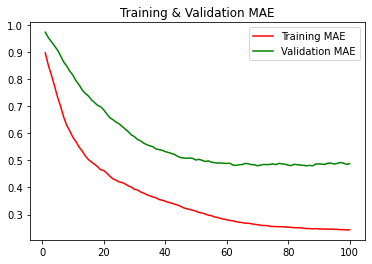

In [ ]:
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training & Validation MAE')
plt.legend()
plt.show()


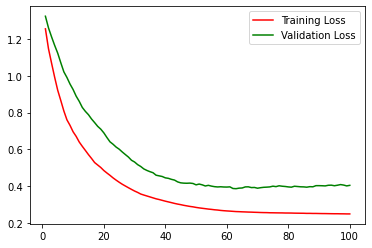

In [ ]:
plt.clf()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.ylabel = 'loss'
plt.xlabel = 'Epochs'
plt.title = ('Training & Validation Loss')

plt.plot (epochs, loss, 'r', label ='Training Loss')
plt.plot(epochs, val_loss, 'g', label= 'Validation Loss')

plt.legend()
plt.show()

In [ ]:
training_result = network.evaluate(x_train,y_train)
training_result

4/4 [==============================] - 0s 3ms/step - loss: 0.2477 - mae: 0.2415


[0.2477491796016693, 0.24152468144893646]

In [ ]:
results = network.evaluate(x_test,y_test)
results

2/2 [==============================] - 0s 9ms/step - loss: 0.4161 - mae: 0.3565


[0.4160783290863037, 0.35646358132362366]

In [ ]:
network.predict(x_test)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(7,activation='relu',input_shape=(52,))) 
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(5,activation='tanh'))

In [ ]:
model.compile(optimizer='rmsprop',loss='mse',metrics='mae')

In [ ]:
history = model.fit(x_train,y_train,
                    epochs=50,
                    batch_size=20)

Models Summary:
initial Model 100 epochs results
&
Model 50 epochs result

In [ ]:
training_result_50_epochs = model.evaluate(x_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.4109 - mae: 0.3956


In [ ]:
result_50_epochs = model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6663 - mae: 0.4856


In [ ]:
training_result_100_epochs = network.evaluate(x_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.2477 - mae: 0.2415


In [ ]:
result_100_epochs = network.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4161 - mae: 0.3565


Prediction Summary of Model 100 epochs and 50 epochs

In [ ]:
network.predict(x_test)

In [ ]:
#50 epochs
model.predict(x_test)